In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import numpy as np

# 0.목표

심장 질환 예측 모델 제작

# 1. 데이터 불러오기

[Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)에서 제공하는 심장병 UCI 데이터셋이다.

In [91]:
df = pd.read_csv("C:/Users/ba874/Desktop/OCL/study/dataset/heart.csv")

### 1.1 불러온 데이터 확인

In [92]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 1.2 데이터 백업

In [93]:
df_bk = df.copy()

In [94]:
df_bk.to_csv("C:/Users/ba874/Desktop/OCL/study/dataset/heart_bak.csv", index =False)

##### 1.2.1 데이터 백업 확인

In [95]:
df_bk_check = pd.read_csv("C:/Users/ba874/Desktop/OCL/study/dataset/heart_bak.csv")

In [96]:
df_bk_check

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 2. 데이터 보기

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


결측치는 따로 존재하지 않아 outlier가 있는지 확인할 필요가 있어 보인다. 이를 위해 일단 전체적인 통계 정보를 확인한다.

In [98]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [99]:
for i in range(2,8):
    print(str(10 * i) +"대는 " + str(df["age"][(df["age"] // 10) == i].count()) +"명 이다.")

20대는 1명 이다.
30대는 15명 이다.
40대는 72명 이다.
50대는 125명 이다.
60대는 80명 이다.
70대는 10명 이다.


age는 27세에서 77세로 따로 이상치를 처리할 필요는 없다고 판단되었다. 40-60대가 90%의 데이터를 찾이하고 있어 age feature를 사용할시 40-60대의 데이터의 영향력이 큰 문제점이 발생할 수 있다. 따라서 모델에 있어서는 age를 제외한고도 모델을 돌려보겠다.

In [100]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

sex 역시 이상치가 따로 없으며 1은 남자, 0은 여성을 의미한다. 남자인 데이터가 약 68%로 쏠려 있어 차후 모델을 만들때에는 제외하고 만들어보고 제외하지 않은 것과의 차이도 비교해볼 필요가 있어보인다.

In [101]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

cp는 흉통의 유형으로 4가지 값인데 여기서 흉통이란 가슴 통증을 의미한다. 하지만 따로 각 유형의 설명이 없어 정확한 정보를 추출하는데에는 한계가 있을 것으로 예상된다. 이에 모델에서는 제외한 것과 제외하지 않은것으로 돌려 비교해보도록 하겠다.

trestbps는 휴식혈압의 값으로 [자료1](https://ko.wikipedia.org/wiki/%EA%B3%A0%ED%98%88%EC%95%95)에 따르면 휴식시 정상 혈압은 수축 100-140 mmHg, 이완 60-90mmHg이고 140/90mmHg 이상일 때 고혈압으로 보고있다. 따라서 max값이 200임으로 따로 이상치 처리할 필요는 없을 것으로 판단된다. 하지만 본 데이터셋의 휴식혈압 단위를 mmHg로 했을지는 표기되지 않아 추측에 불가하다.

chol은 mg/dl 단위의 혈청 콜레스톨의 데이터로 [자료2](https://ko.wikipedia.org/wiki/%EC%B4%9D%EC%BD%9C%EB%A0%88%EC%8A%A4%ED%85%8C%EB%A1%A4)에 따르면 성인의 경우 200mg/dl까지는 정상 240mg/dl 이상은 위험으로 본다고 나와있다. 이에 max값인 564를 어떻게 볼지는 [자료3](https://www.kslm.org/sub01/sub03_4.html)을 참고하여도 정확히 알기 힘들어 더 자세히 분석해보고 판단하도록 하겠다.

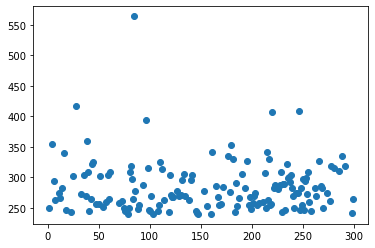

In [102]:
plt.plot(df["chol"][df["chol"] >= 240], 'o')

chol의 위험군 범위인 240mg/dl 이상의 값들만 보았을 때에도 450을 넘는 값은 단 하나임으로 이상치로 보되 실제 질환 환자임일 수 있음으로 이상치처리한 dataset과 이상치처리하지 않은 데이터셋, 고위험군으로 보되 550이상은 너무 극단적으로 보임으로 범주형 변환을 통한 dataset, 마지막으로 위험군이되 240의 두배인 480값으로 단순 변경하여 처리한 dataset으로 두어 분석 및 모델 결과의 차이를 보도록 하겠다.

In [103]:
df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

fbs는 공복혈당이 120mg/dl 초과이면 1, 아니면 0으로 이는 [자료4](https://www.chamc.co.kr/health/e_clinic/content.asp?cc_id=10606&co_id=1512&ct_id=106)에서 정상치를 110mg/dl로 본 것처럼 여기서는 120까지를 정상치로 본 것으로 추측된다. 즉, 1이면 혈당에 이상이 있다고 봐도 무관할 듯 싶다. 데이터가 다소 0으로 쏠려있어 모델에서는 이 피쳐에 유무에 따른 성능 비교를 해보도록 하겠다.

In [104]:
df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

restecg는 휴식 심전도 결과로 값을 0,1,2 값을 가진다. [자료5](https://www.netinbag.com/ko/health/what-is-a-resting-ecg.html)에 따르면 휴식 심전도는 심장의 전기적 활동을 측정하는 검사이며 대상자가 휴식 중일 때 시행하여 측정한 결과이다. 하지만 이 데이터셋 설명에서는 각 숫자가 의미하는 바를 알려주지 않아 정확히 분석하는데에는 한계가 있다. 따라서 이 데이터는 사용하지 않도록 하겠다.

thalach는 최대 심박수는 운동후인지 운동 전인지 등 정확한 정의가 되어있지는 않아 따로 이상치로 판단하거나 하지는 않겠다. 그리고 [자료6](https://m.blog.naver.com/PostView.nhn?blogId=2016royel&logNo=220924133585&proxyReferer=https:%2F%2Fwww.google.com%2F)에 따르면 고혈압 위기를 수축기혈압180 초과로 보기에 별다른 처리를 하지 않겠다. 

In [105]:
df["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

exang는 운동으로 인한 협심증이 있으면 1, 없으면 0이다. 약 33%의 데이터 만이 운동으로 인한 협심증을 가지고 있다. 따라서 모델에서는 이 feature의 유무에 따른 비교를 해보겠다. 여기서 협신증이란 [자료7](http://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=32179)에 따르면 심장에 혈액을 공급하는 혈관인 관상 동맥이 동맥 경화증으로 좁아져서 생기는 질환이다.

oldpeak와 slope는 정확한 사전지식을 이해하기 힘들어 사용하지 않도록 하겠다.

In [106]:
df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

ca는 0-3사이의 플루로 소피로 착색 된 주요 혈관수라고 설명하고 있으나 플루로 소피가 무엇인지 찾을 수 없고 범위 밖의 값인 4의 처리가 모호하기 때문에 이 feature역시 제외하도록 하겠다.

In [107]:
df["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

thal는 3이면 정상, 6이면 고정된 결함, 7이면 가역적 결함이다라고 설명하고 있으나 실제 데이터는 0-3의 범위에서 값들을 가지고 있어 어떻게 처리해야할지 모호한 부분이 발생한다. 따라서 이 데이터는 사용하지 않도록 하겠다.

In [108]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

target은 1이면 심장질환 존재, 0이면 존재하지 않음이다. 여기서 심장질환 존재하는 사람은 약 54%, 존재하지 않는 사람은 약 46%로 유사하게 분포하고 있어 각 feature들에 따른 상관관계 등을 파악할 수 있을 것으로 기대된다.

### 2.1 요약

아래 정리된 feature들에 따라 모델 구현시 반영을 하되 시각화에서는 모두 사용해볼 것이다. 또한, 전체 피쳐를 그대로 넣은 것을 기준으로 여러 시도들을 한 것들과 성능 역시도 비교해볼 예정이다.

##### 2.1.1 사용하지 않을 feature

thal, ca, oldpeak, slope, restecg

##### 2.1.2 모델 제작시 유무에 따른 비교해볼 feature

exang, fbs, cp, sex, age

##### 2.1.3 이상치 처리를 시도해볼 feature

chol

# 3. 데이터 전처리

### 3.1 사용하지 않을 feature 제거

In [109]:
df_drop = df.drop(["exang", "fbs", "cp", "sex", "age"], axis = 1)

In [110]:
df_drop

,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target
0,145,233,0,150,2.3,0,0,1,1
1,130,250,1,187,3.5,0,0,2,1
2,130,204,0,172,1.4,2,0,2,1
3,120,236,1,178,0.8,2,0,2,1
4,120,354,1,163,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,140,241,1,123,0.2,1,0,3,0
299,110,264,1,132,1.2,1,0,3,0
300,144,193,1,141,3.4,1,2,3,0
301,130,131,1,115,1.2,1,1,3,0


### 3.2 이상치 처리

##### 3.2.1 해당 데이터 row 삭제

In [111]:
df_row_out = df[df["chol"] < 450]

In [112]:
df_row_out.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.324503,0.685430,0.963576,131.678808,245.211921,0.149007,0.529801,149.612583,0.327815,1.037748,1.400662,0.731788,2.311258,0.543046
std,9.067887,0.465115,1.032044,17.541015,48.567877,0.356686,0.525849,22.935390,0.470196,1.162552,0.616818,1.023438,0.612011,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### 3.2.2 해당 데이터 480으로 대체

In [113]:
df_out_480 = df.copy()

In [114]:
df_out_480["chol"] = df_out_480["chol"][df_out_480["chol"] < 450]

In [115]:
df_out_480.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,245.211921,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,48.567877,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [116]:
df_out_480["chol"] = df_out_480["chol"].fillna(480)

In [117]:
df_out_480.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,245.986799,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,50.328522,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,480.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### 3.2.3 범주형 변환

[자료2](https://ko.wikipedia.org/wiki/%EC%B4%9D%EC%BD%9C%EB%A0%88%EC%8A%A4%ED%85%8C%EB%A1%A4)에서 말했듯이 200이하는 정상 200-240은 주의, 240이상은 위험임으로 200이하는 0으로 200-240은 1로 240이상은 2로 변환하겠다.

In [118]:
df_cat = df.copy()

In [119]:
df_cat["chol"][df_cat["chol"] <= 200] = 0

<ipython-input-119-cca8943dbbfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat["chol"][df_cat["chol"] <= 200] = 0


In [120]:
df_cat["chol"][(df_cat["chol"] > 200) & (df_cat["chol"] < 240)] = 1

<ipython-input-120-6e6abcade7e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat["chol"][(df_cat["chol"] > 200) & (df_cat["chol"] < 240)] = 1


In [121]:
df_cat["chol"][df_cat["chol"] >= 240] = 2

<ipython-input-121-02b411d42fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat["chol"][df_cat["chol"] >= 240] = 2


In [122]:
df_cat["chol"].value_counts()

2    155
1     97
0     51
Name: chol, dtype: int64

# 4. 데이터 시각화

In [123]:
conts = ['age','trestbps','chol', 'thalach']

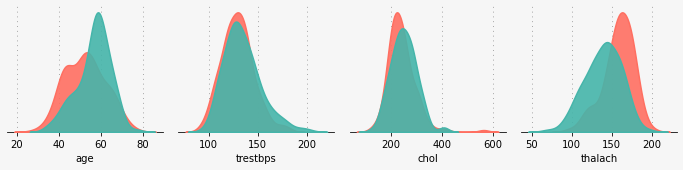

In [124]:
fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#f6f6f6"

run_no = 0
for row in range(0, 1):
    for col in range(0, 4):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1
        
s = df[df['target'] == 1]
ns = df[df['target'] == 0]
        
run_no = 0
for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(run_no)], color='#ff6f61', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(run_no)], color='#45b5aa', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(feature)
        run_no += 1


#ax15.get_xaxis().set_visible(False)
plt.show()

붉은 색은 심장병이 있음을 푸른색은 심장병이 없을을 의미한다.

In [125]:
str_only = df[df['target'] == 1]
no_str_only = df[df['target'] == 0]

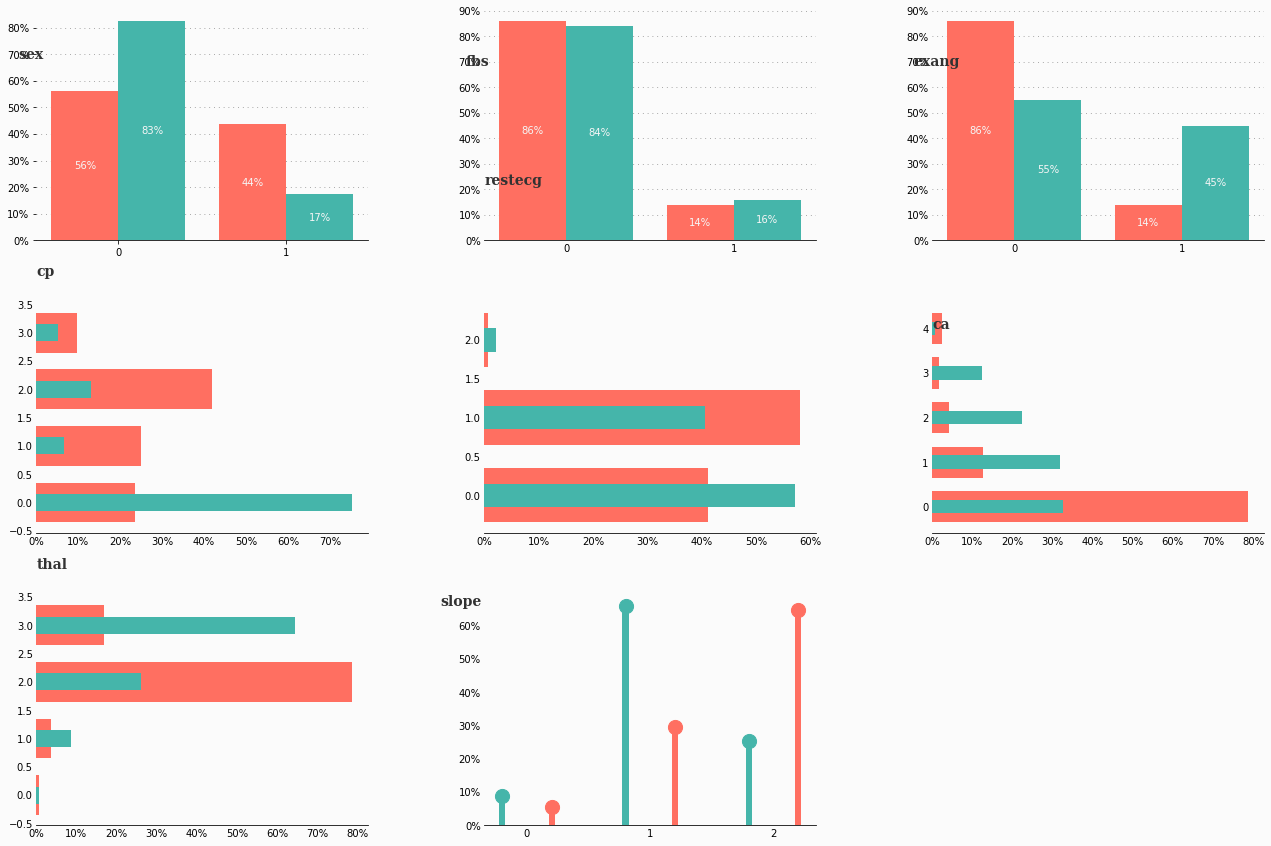

In [149]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])

background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 

train_graph_temp_df = pd.DataFrame(str_only["sex"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["sex"].apply(lambda x: x/sum(train_graph_temp_df["sex"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["sex"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["sex"].apply(lambda x: x/sum(test_graph_temp_df["sex"])*100)

x = np.arange(len(train_graph_temp_df))
ax0.text(-0.4, 68.5, 'sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#ff6f61", width=0.4)
ax0.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#45b5aa", width=0.4)
ax0.set_xticks(x + 0.4 / 2)
ax0.set_xticklabels(['0','1'])
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train_graph_temp_df["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_graph_temp_df["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
train_graph_temp_df = pd.DataFrame(str_only["fbs"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["fbs"].apply(lambda x: x/sum(train_graph_temp_df["fbs"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["fbs"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["fbs"].apply(lambda x: x/sum(test_graph_temp_df["fbs"])*100)

x = np.arange(len(train_graph_temp_df))
ax1.text(-0.4, 68.5, 'fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#ff6f61", width=0.4)
ax1.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#45b5aa", width=0.4)
ax1.set_xticks(x + 0.4 / 2)
ax1.set_xticklabels(['0','1'])
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train_graph_temp_df["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_graph_temp_df["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

train_graph_temp_df = pd.DataFrame(str_only["exang"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["exang"].apply(lambda x: x/sum(train_graph_temp_df["exang"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["exang"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["exang"].apply(lambda x: x/sum(test_graph_temp_df["exang"])*100)

x = np.arange(len(train_graph_temp_df))
ax2.text(-0.4, 68.5, 'exang', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#ff6f61", width=0.4)
ax2.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#45b5aa", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['0','1'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train_graph_temp_df["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_graph_temp_df["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
train_graph_temp_df = pd.DataFrame(str_only["cp"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["cp"].apply(lambda x: x/sum(train_graph_temp_df["cp"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["cp"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["cp"].apply(lambda x: x/sum(test_graph_temp_df["cp"])*100)

ax3.text(0, 4, 'cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.barh(train_graph_temp_df.index, train_graph_temp_df['Percentage'], color="#ff6f61", zorder=3, height=0.7)
ax3.barh(test_graph_temp_df.index, test_graph_temp_df['Percentage'], color="#45b5aa", zorder=3, height=0.3)
ax3.xaxis.set_major_formatter(mtick.PercentFormatter())
ax3.xaxis.set_major_locator(mtick.MultipleLocator(10))

train_graph_temp_df = pd.DataFrame(str_only["restecg"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["restecg"].apply(lambda x: x/sum(train_graph_temp_df["restecg"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["restecg"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["restecg"].apply(lambda x: x/sum(test_graph_temp_df["restecg"])*100)

ax4.text(0, 4, 'restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax4.barh(train_graph_temp_df.index, train_graph_temp_df['Percentage'], color="#ff6f61", zorder=3, height=0.7)
ax4.barh(test_graph_temp_df.index, test_graph_temp_df['Percentage'], color="#45b5aa", zorder=3, height=0.3)
ax4.xaxis.set_major_formatter(mtick.PercentFormatter())
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))

train_graph_temp_df = pd.DataFrame(str_only["ca"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["ca"].apply(lambda x: x/sum(train_graph_temp_df["ca"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["ca"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["ca"].apply(lambda x: x/sum(test_graph_temp_df["ca"])*100)

ax5.text(0, 4, 'ca', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.barh(train_graph_temp_df.index, train_graph_temp_df['Percentage'], color="#ff6f61", zorder=3, height=0.7)
ax5.barh(test_graph_temp_df.index, test_graph_temp_df['Percentage'], color="#45b5aa", zorder=3, height=0.3)
ax5.xaxis.set_major_formatter(mtick.PercentFormatter())
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

train_graph_temp_df = pd.DataFrame(str_only["thal"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["thal"].apply(lambda x: x/sum(train_graph_temp_df["thal"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["thal"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["thal"].apply(lambda x: x/sum(test_graph_temp_df["thal"])*100)

ax6.text(0, 4, 'thal', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.barh(train_graph_temp_df.index, train_graph_temp_df['Percentage'], color="#ff6f61", zorder=3, height=0.7)
ax6.barh(test_graph_temp_df.index, test_graph_temp_df['Percentage'], color="#45b5aa", zorder=3, height=0.3)
ax6.xaxis.set_major_formatter(mtick.PercentFormatter())
ax6.xaxis.set_major_locator(mtick.MultipleLocator(10))

train_graph_temp_df = pd.DataFrame(str_only["slope"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["slope"].apply(lambda x: x/sum(train_graph_temp_df["slope"])*100)
train_graph_temp_df = train_graph_temp_df.sort_index()

test_graph_temp_df = pd.DataFrame(no_str_only["slope"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["slope"].apply(lambda x: x/sum(test_graph_temp_df["slope"])*100)
test_graph_temp_df = test_graph_temp_df.sort_index()

ax7.bar(test_graph_temp_df.index, height=test_graph_temp_df["Percentage"], zorder=3, color="#45b5aa", width=0.05)
ax7.scatter(test_graph_temp_df.index, test_graph_temp_df["Percentage"], zorder=3,s=200, color="#45b5aa")
ax7.bar(np.arange(len(train_graph_temp_df.index))+0.4, height=train_graph_temp_df["Percentage"], zorder=3, color="#ff6f61", width=0.05)
ax7.scatter(np.arange(len(train_graph_temp_df.index))+0.4, train_graph_temp_df["Percentage"], zorder=3,s=200, color="#ff6f61")

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(train_graph_temp_df.index))+0.4 / 2)
ax7.set_xticklabels(list(train_graph_temp_df.index),rotation=0)
ax7.text(-0.5, 66, 'slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# tidy up

ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax3.tick_params(axis=u'both', which=u'both',length=0)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax5.tick_params(axis=u'both', which=u'both',length=0)
ax6.tick_params(axis=u'both', which=u'both',length=0)
ax7.tick_params(axis=u'both', which=u'both',length=0)



for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)

plt.show()